#### Paquetes necesarios

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

#### Selección de imagen y aplicación del operador Sobel

(1502, 1502)


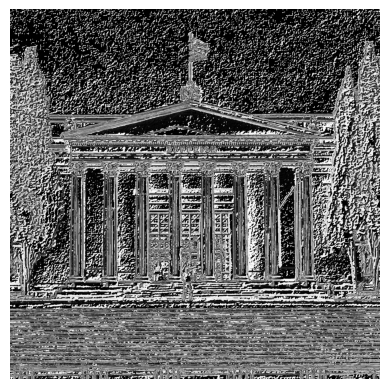

In [31]:
# Lee imagen de archivo
img = cv2.imread('Images/grecia.jpg') 

# Conversión de la imagen a escala de grises desde BGR
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Filtro Gaussiano para suavizar la imagen original
ggris = cv2.GaussianBlur(gris, (9, 9), 0)

# Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y

#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

# Conversión a 8 bits
sobel8 = np.uint8(sobel)

print(sobel8.shape)

# Muestra la imagen
plt.figure()
plt.axis("off")
plt.imshow(sobel8, cmap="gray")
plt.show()

#### Histograma de la imagen para obtener umbral

(0.0, 256.0)

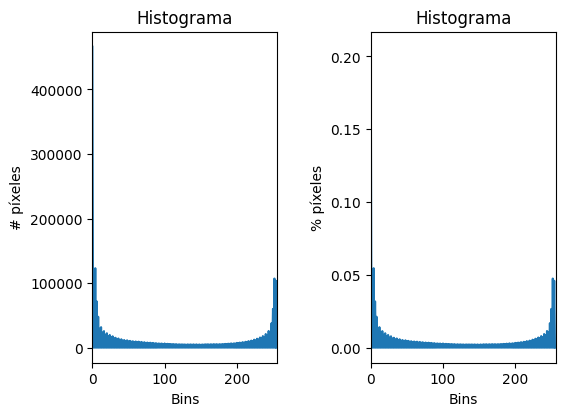

In [42]:
# Cálculo del histograma de una imagen en escala de grises
hist = cv2.calcHist([sobel8], [0], None, [256], [0, 256])

# Histograma sin normalizar
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("# píxeles")
plt.plot(hist)
plt.xlim([0, 256])

# Normaliza el histograma en base al número de píxeles y lo muestra
hist /= hist.sum()

plt.subplot(1, 2, 2)
plt.title("Histograma")
plt.xlabel("Bins")
plt.ylabel("% píxeles")
plt.tight_layout(pad=3.0) # Separación entre plots
plt.plot(hist)
plt.xlim([0, 256])

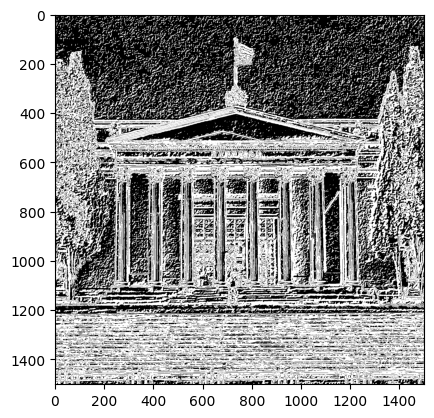

In [43]:
# Define valor umbral
valorUmbral = 40 

# Obtiene imagen umbralizada para dicho valor definido
res, imagenUmbralizada = cv2.threshold(sobel8, valorUmbral, 255, cv2.THRESH_BINARY)

# Muestra resultado
plt.imshow(imagenUmbralizada, cmap='gray') #Visualiza con mapa de color gris
plt.show()